###### A Data Science Tutorial by Agustin Morinigo  |   Fall 2022

### Table of Contents:
1. [Introduction](https://agustin-mor.github.io/)
2. [Data Collection/Curation + Parsing](https://agustin-mor.github.io/#2.-Data-Collection/Curation-+-Parsing)
3. [Data Management/Representation](https://agustin-mor.github.io/#3.-Data-Management/Representation)
4. [Exploratory Data Analysis](https://agustin-mor.github.io/#4.-Exploratory-Data-Analysis])
5. [Hypothesis Testing](https://agustin-mor.github.io/#5.-Hypothesis-Testing)
6. [Communication of Insights Attained](https://agustin-mor.github.io/#6.-Communication-of-Insights-Attained)
    
    

## 1. Introduction

Welcome!
    
Data science is an ever growing (and well paid) field which allows you to get to the bottom of what's happening in the world. In this tutorial we are going to be demonstrating the 'Data Science Pipeline,' a general guide into everything you'll need to know to do data science by yourself. No College tuition required!

A topic that has been on debate for a while now has been the cost of of college. Students and parents alike claim that the cost of Colleges/Universities are too damn high, higher than they've ever been. The general conversation tends to go like this:

**Students:** "You're charging us too much, we can't afford it."
    
**Colleges/Universities:** "but what if we charged you even more?! :D"
    
**Students:** "Will you at least give us air conditioning in the dorms and mental health support?"

**Colleges/Universities:** "lmaooo........ no."
    
For this tutorial we are going to be explore the claim "the cost of Colleges/Universities are too damn high, higher than they've ever been," and we are going to do so with data!

#### Imports
These are all the libraries will be be using for this tutorial.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

## 2. Data Collection/Curation + Parsing

Before we do any type of data science we must do two things:
1. Get data
2. Parse data

Data comes in the form of datasets which can be created or found *(I'll list some resources at the bottom for finding datasets). In this case we will be using following two datasets:

[Table D-1. Historical Median Income Using Alternative Price Indices: 1967 to 2021](https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx)


[Table 330.10. Average undergraduate tuition, fees, room, and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: Selected years, 1963-64 through 2020-21](https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls)

If you open up these files you'll notice that they aren't just datasets. They both have headers and footnotes which we don't want. To adjust for this we parse the data. Parsing is the act of fitting files into our use case. In order to parse our excel files into dataframes we will be using the pandas 'read_excel()' function to extract the data and ignore the header and footnotes.


Free resources for finding Datasets:
- [kaggle.com](https://www.kaggle.com/)
- [datasetsearch.research.google.com](https://datasetsearch.research.google.com/)
- [wikipedia.org/wiki/List_of_open_government_data_sites](https://en.wikipedia.org/wiki/List_of_open_government_data_sites)
- You can also often find datasets directly on the sites of organizations.



In [2]:
# Parsing excel data into a pandas dataframe (Skipping the header and footnotes)
# NOTE: We are also cutting off some data in the 'df_college_cost' that will wont be using for this tutorial. 
df_median_income = pd.read_excel('https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx', skiprows=5, skipfooter=26)
df_college_cost = pd.read_excel('https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls', skiprows=[0,1,2,4], skipfooter=53)

# We'll display the heads of the table so we can get an idea of what they currently look like
display(df_median_income.head())
display(df_college_cost.head())

,Unnamed: 0,Estimate,Margin of\nerror1 (±),Estimate.1,Margin of\nerror1 (±).1,Estimate.2,Margin of\nerror1 (±).2,Estimate.3,Margin of\nerror1 (±).3
0,2021,70784.000000,605.000000,70784.00,605.0,70784.000000,605.000000,70784.000000,605
1,2020 2,68010.283709,879.912782,71186.00,921.0,71117.409473,920.112580,71117.409473,920
2,2019,68702.748083,904.921053,72808.49,959.0,72612.823597,956.422772,72612.823597,956
3,2018,63179.264160,691.405514,68168.00,746.0,67745.710038,741.378648,67745.710038,741
4,2017 3,61135.666667,529.285714,67571.00,585.0,66877.413663,578.995235,66877.413663,579


,Unnamed: 0,All insti-tutions,4-year,2-year,All insti-tutions.1,4-year.1,2-year.1,All insti-tutions.2,4-year.2,2-year.2,...,2-year.4,All insti-tutions.5,4-year.5,2-year.5,All insti-tutions.6,4-year.6,2-year.6,All insti-tutions.7,4-year.7,2-year.7
0,All institutions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-64,10647.560685,10973.419962,6616.176052,4336.485596,4714.725456,1461.132123,2408.995351,2377.060276,1784.429953,...,775.433503,508.247693,552.578415,171.248587,282.340689,278.597813,209.139956,457.334166,454.937898,395.044960
2,1968-69,10761.619228,11400.863864,7768.613279,4399.734947,5041.302500,1847.435646,2658.026787,2656.948648,2411.736521,...,1052.943480,596.331940,683.288820,250.398012,360.264036,360.117907,326.882309,502.013997,501.845282,475.663160
3,1969-70,10867.658503,11664.805710,7588.871723,4494.224441,5259.592862,1723.750009,2711.470481,2729.899729,2416.688472,...,1089.373133,645.140350,755.008039,247.442178,389.228228,391.873724,346.912636,525.670335,527.586644,495.018319
4,1970-71,10947.894604,11819.924047,7421.699083,4557.678257,5390.787280,1652.395594,2774.404823,2794.910341,2447.272193,...,1120.371939,688.022348,813.787615,249.443912,418.821253,421.916745,369.437653,545.839130,548.619024,501.490373


## 3. Data Management/Representation

It's important to note that parsing data doesn't always work perfectly and this case is an example of that. If you look at the source excel files you'll notice a handful of issues in our dataframes:
- Almost all values have turned into a float approximation of our integers
- We've lost the column group names
- Some of the years in 'df_median_income' have extra characters

In addition to these errors we also have some formatting issues:
- 'df_median_income's year column is in descending order, unlike 'df_college_cost'
- 'df_median_income' has some repeating years (We'll show this later)
- 'df_college_cost's year column is an interval
- 'df_college_cost' has labels in rows
- Both dataframes have bad column names

Before we do any kind of exploratory analysis we must address these issues, and the best way to start is by getting rid of the columns we don't need.


For our 'df_median_income' we will only be using the first three columns: Year, Current Dollars- Estimate, and Current Dollars- Margin of error.

For our 'df_college_cost' we will only use the 1st, 14th, 17th, 20th, and 23rd columns which represent the current dollars estimate cost for all institutions (2 and 4 year) in regards to total cost, only tuition and fees, only dormitory rooms, and only board.

In [3]:
# Dropping columns from df_median_income
df_median_income.drop(columns=df_median_income.columns[3:], inplace=True)

# Renaming Columns
df_median_income.columns = ['Year', 'Estimate', 'Error']

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Year,Estimate,Error
0,2021,70784.000000,605.000000
1,2020 2,68010.283709,879.912782
2,2019,68702.748083,904.921053
3,2018,63179.264160,691.405514
4,2017 3,61135.666667,529.285714


In [4]:
# Dropping columns from df_college_cost
df_college_cost.drop(columns=df_college_cost.columns[1:13], inplace=True)

four_year_columns = df_college_cost.columns[2::3]
two_year_columns = df_college_cost.columns[3::3]

df_college_cost.drop(columns=four_year_columns, inplace=True)
df_college_cost.drop(columns=two_year_columns, inplace=True)

# Renaming Columns
df_college_cost.columns = ['Year', 'Total', 'Tuition_and_Fees', 'Dormitory', 'Board']

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Year,Total,Tuition_and_Fees,Dormitory,Board
0,All institutions,NaN,NaN,NaN,NaN
1,1963-64,1247.922549,508.247693,282.340689,457.334166
2,1968-69,1458.609973,596.331940,360.264036,502.013997
3,1969-70,1560.038913,645.140350,389.228228,525.670335
4,1970-71,1652.682730,688.022348,418.821253,545.839130


Now that we've further isolated our dataframes we can start fixing the errors and formatting issues.

Let's start by fixing the values for 'df_median_income'. 

In [5]:
# Removing extra characters from 'Year' column and changing type to integer
df_median_income['Year'] = df_median_income['Year'].astype(str).str.slice(0,4)
df_median_income = df_median_income.apply(pd.to_numeric)

# Turning the float approximations back into integers
df_median_income = df_median_income.apply(lambda value: round(value,0))
df_median_income = df_median_income.astype(int)

# Sorting dataframe by year in ascending order
df_median_income.sort_values(by=['Year'], inplace=True)

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Year,Estimate,Error
56,1967,7143,43
55,1968,7743,46
54,1969,8389,51
53,1970,8734,53
52,1971,9028,58


Next we can get rid of the duplicate years.

In [6]:
# Finding duplicate years
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error
10,2013,51939,454
9,2013,53585,1076
5,2017,61372,551
4,2017,61136,529


In [7]:
# We'll chose to keep the first of each duplicate year
df_median_income.drop_duplicates(subset=['Year'], keep='first', inplace=True)

# Confirming the dropping of duplicate years (should be empty).
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error


Lastly let's reset the index as our changes have mixed it up

In [8]:
# Reset index to make the dataframe easier to work with
df_median_income.reset_index(drop=True, inplace=True)

# Displaying head of dataframe
df_median_income.head()

,Year,Estimate,Error
0,1967,7143,43
1,1968,7743,46
2,1969,8389,51
3,1970,8734,53
4,1971,9028,58


Now that we've fixed all the issues with 'df_median_income' we can start fixing the issues with 'df_college_cost'.

The 'df_college_cost' dataframe is actually a three dataset put together (All Institutions, Public Institutions, and Private Institutions). We'll start by finding and deleting the labels for these datasets, this will allow us to fix the issues with the data, then we can split each dataset into it's own dataframe.

In [9]:
# Finding the row locations for the labels of the three datasets
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition_and_Fees,Dormitory,Board
0,All institutions,NaN,NaN,NaN,NaN
55,Public insti-\n tutions,NaN,NaN,NaN,NaN
110,Private \n nonprofit and\n for-profit\n ...,NaN,NaN,NaN,NaN


In [10]:
# Removing labels
df_college_cost.drop([0,55,110], inplace=True)

# Checking to see if we've removed all labels (should be empty)
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition_and_Fees,Dormitory,Board


In [11]:
# Fixing the format of the 'Year' column by only taking the first year of the interval 
# and parsing it as an int
df_college_cost['Year'] = df_college_cost['Year'].astype(str).str.slice(0,4)
df_college_cost = df_college_cost.apply(pd.to_numeric)

# Turning the float approximations back into integers
df_college_cost = df_college_cost.apply(lambda values: round(values,0))
df_college_cost = df_college_cost.astype(int)

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Year,Total,Tuition_and_Fees,Dormitory,Board
1,1963,1248,508,282,457
2,1968,1459,596,360,502
3,1969,1560,645,389,526
4,1970,1653,688,419,546
5,1971,1730,724,445,562


Now that we've fixed all the issues with 'df_college_cost' we can split each dataset into it's own dataframe and reset their indexes.

In [12]:
# Splitting Dataset into different tables
df_college_cost_all = df_college_cost[:54]
df_college_cost_public = df_college_cost[54:108]
df_college_cost_private = df_college_cost[108:]

# Resting the indexes to make the new datasets easier to work with
df_college_cost_all.reset_index(drop=True, inplace=True)
df_college_cost_public.reset_index(drop=True, inplace=True)
df_college_cost_private.reset_index(drop=True, inplace=True)

The last thing we want to do merge all of our new dataframes with the 'df_median_income' dataframe. We do this as it allows us to contain all relevant information into a single dataframe, making it easier to work with.

In [13]:
# Merging Dataframes on Year
df_college_cost_all = df_college_cost_all.merge(df_median_income, how='inner', on='Year')
df_college_cost_public = df_college_cost_public.merge(df_median_income, how='inner', on='Year')
df_college_cost_private = df_college_cost_private.merge(df_median_income, how='inner', on='Year')

# Turning 'df_college_cost' into a list of all three dataframes
df_college_cost = [df_college_cost_all, df_college_cost_public, df_college_cost_private]

## 4. Exploratory Data Analysis

Now that we have all of our data ready we can begin analyzing it. For this section it's best to start off simple and get to the finer details later. Our main objective is to find relationships between median salary and the total cost for college so lets start off by plotting just those columns in a line graph.

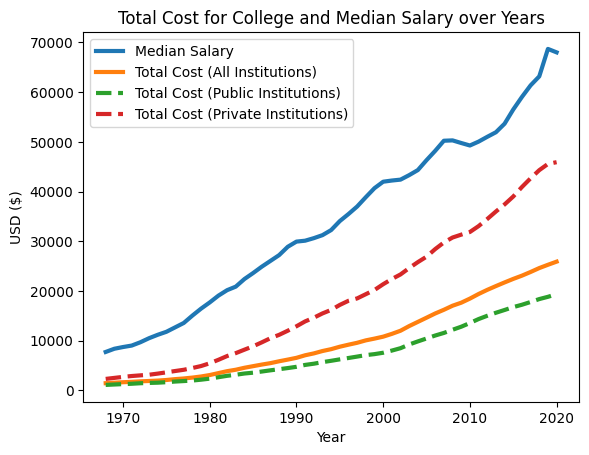

In [14]:
# Plotting median salary
plt.plot(
    df_college_cost_all['Year'],
    df_college_cost_all['Estimate'],
    linewidth= 3
)

# Plotting the total costs for each type of institution
for idx, df in enumerate(df_college_cost):
    plot = plt.plot(
        df['Year'],
        df['Total'],
        linewidth= 3
    )

    # Changing line style to distinguish institution types
    if idx > 0:
        plt.setp(plot, linestyle='--')

            
# Labeling plot
plt.xlabel('Year')
plt.ylabel('USD ($)')
plt.title('Total Cost for College and Median Salary over Years')
plt.legend(['Median Salary', 
            'Total Cost (All Institutions)', 
            'Total Cost (Public Institutions)', 
            'Total Cost (Private Institutions)'])

# Displaying plot
plt.show()

From this plot we can already start making observations. Median Salary and Total Cost have both increased throughout the years with private institutions increasing more rapidly than public institutions, but how much of the Median Salary is taken up by the Total Cost? We'll we can plot that too!

If we take the Total Cost per year and divide it by the Median Salary estimates per year then we'll get the ratio of how much a Median Salary is consumed by the Total Cost of college.

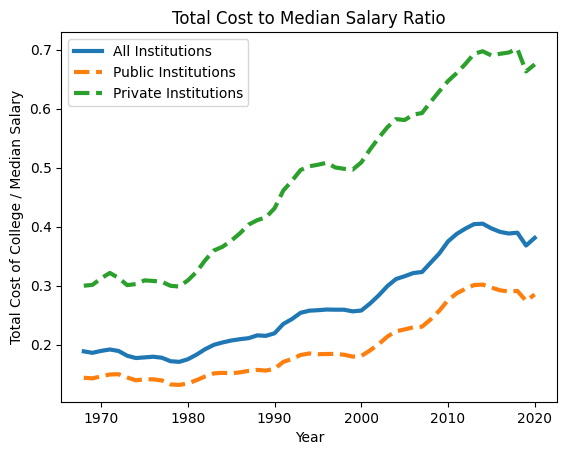

In [15]:
# Plotting total cost to median salary ratios for each type of institution
for idx, df in enumerate(df_college_cost):

    plot = plt.plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=3,
    )

    # Changing line style to distinguish institution types
    if idx > 0:
        plt.setp(plot, linestyle='--')
    

    # Labeling plot
    plt.title('Total Cost to Median Salary Ratio')
    plt.xlabel('Year')
    plt.ylabel('Total Cost of College / Median Salary')
    plt.legend(['All Institutions', 'Public Institutions', 'Private Institutions'])

# Displaying plot
plt.show()

We can now observe that the amount of a Median Salary that would be consumed by the Total Cost for college has increased throughout the years, but let's break this down further.

The Total Cost column represents the sum totals of Tuition and Fees, Dormitory costs, and Board costs, all of which we have columns for, so let's plot out how much each of those individual columns represent the Total Cost. This time instead of a line plot let's use a stackplot as it shows the breakdown of costs and also shows the total cost without us needing to plot it.

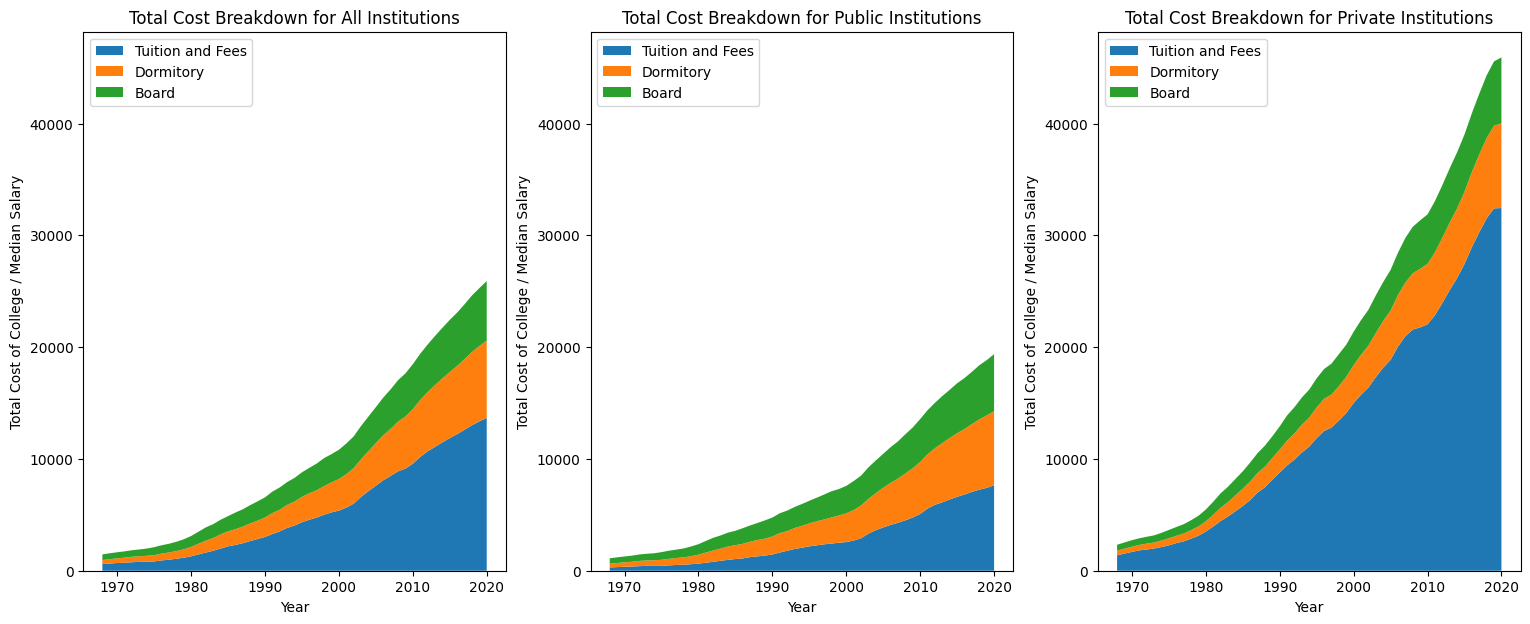

In [16]:
# Creating frames for subplot
fig, axes = plt.subplots(1,3, figsize=(5,7), sharey=True)

# Creating titles for each plot
fig_titles = ['Total Cost Breakdown for All Institutions',
              'Total Cost Breakdown for Public Institutions',
              'Total Cost Breakdown for Private Institutions']

# Plotting total cost stackplot for each type of institution
for idx, df in enumerate(df_college_cost):
    plot = fig.axes[idx].stackplot(
        df['Year'],
        df['Tuition_and_Fees'],
        df['Dormitory'],
        df['Board']
    )

    # Labeling plot
    fig.axes[idx].set_title(fig_titles[idx])
    fig.axes[idx].set_xlabel('Year')
    fig.axes[idx].set_ylabel('Total Cost of College / Median Salary')
    fig.axes[idx].legend(['Tuition and Fees', 'Dormitory', 'Board'], loc='upper left')
    fig.axes[idx].yaxis.set_tick_params(labelleft=True)

# Adjusting spacing for subplots
fig.subplots_adjust(right=3)

# Displaying plots
plt.show()

We can see here that, in all cases, Total Cost has increased with Tuition and Fees taking up the largest share of responsibility, then followed by Dormitory costs and Board costs in that order. It's hard to quantify how these ratios compare with each other in relation to the Median Salary though, so let's go back to plotting these as ratios in a line graph.

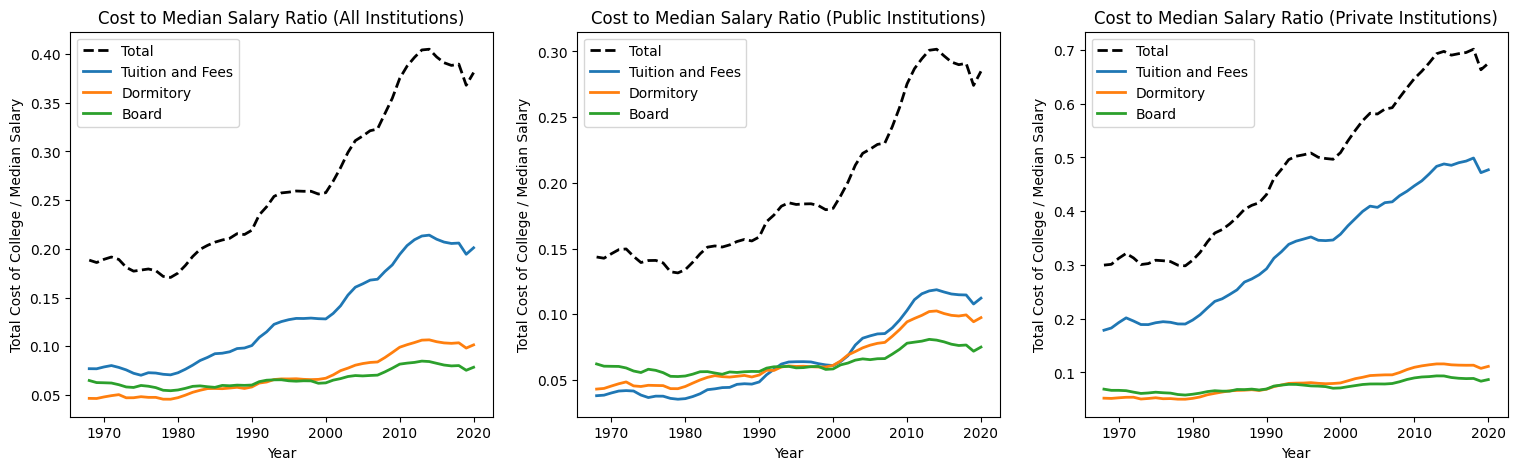

In [17]:
# Creating frames for subplots
fig, axes = plt.subplots(1,3, figsize=(5, 5), sharey=False)

# Creating titles for each plot
fig_titles = ['Cost to Median Salary Ratio (All Institutions)',
              'Cost to Median Salary Ratio (Public Institutions)',
              'Cost to Median Salary Ratio (Private Institutions)']

# Plotting ratios of Median Salary for each type of cost, for each type of institution
for idx, df in enumerate(df_college_cost):

    # Plotting Total cost ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=2,
        color='k',
        linestyle='--'
    )

    # Plotting Tuition and Fees ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Tuition_and_Fees'] / df['Estimate'],
        linewidth=2
    )

    # PLotting Dormitory ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Dormitory'] / df['Estimate'],
        linewidth=2
    )

    # Plotting Board ratio
    fig.axes[idx].plot(
        df['Year'],
        df['Board'] / df['Estimate'],
        linewidth=2
    )

    # Labeling plots
    fig.axes[idx].set_title(fig_titles[idx])
    fig.axes[idx].set_xlabel('Year')
    fig.axes[idx].set_ylabel('Total Cost of College / Median Salary')
    fig.axes[idx].legend(['Total', 'Tuition and Fees', 'Dormitory', 'Board'], loc='upper left')
    fig.axes[idx].yaxis.set_tick_params(labelleft=True)

# Adjusting spacing for subplots
fig.subplots_adjust(right=3)

# Displaying plots
plt.show()

Finally from these plots we can see how much of the median salary is taken up by each cost (Tuition and Fees, Dormitory, and Board). We can observe that the cost ratio has increased for each type of cost, but if we wanted to predict how this might look in future years we couldn't. This is where models and hypothesis testing comes in.

## 5. Hypothesis Testing

To predict future values for a column we need to do two things:
1. Construct a regression model
2. Test the model

A regression model describes, in a general sense, the expected value for a variable at any given point. There are many different types of regression, but here we'll only be using linear regression models. [Here's some more information on regression types.](https://en.wikipedia.org/wiki/Regression)

Constructing a model doesn't inherently mean that the model will be accurate, this is where hypothesis testing comes in. Without going too deep into specifics, we assign a level of significance to a variable called alpha (**α**). An alpha of 0.05 means that we can say with 95% certainty that our model is accurate, **α** = 0.10 would indicate a 90% level of confidence, and so on. We compare **α** to whats known as the P-value. If the P-value is less than **α** then we can say that out regression model is accurate at the given level of confidence. [You can find more information on Hypothesis Tests here.](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)

To start off with, let's construct, and test, a linear regression model on the Total Cost to Median Salary ratio for all institutions.

In [18]:
# Creating total cost to median salary ratio columns for each type of institution's dataframe
for df in df_college_cost:
    df['Ratio'] = df['Total'] / df['Estimate']

# Modeling linear regression
model_all_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_all).fit()

# Displaying 'All Institutions' model results
print('\n------------------------------------------------\
    \nAll Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_all_institutions.summary())


------------------------------------------------    
All Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     503.5
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.36e-28
Time:                        18:41:10   Log-Likelihood:                 122.77
No. Observations:                  53   AIC:                            -241.5
Df Residuals:                      51   BIC:                            -237.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

There are only two columns that are important to us in this result: the 'coef' column, and the 'P>|t|' column. The 'coef' column represents the intercept and slope of our linear regression model. 

Recall the formula for a line is y = a*x + b. The 'Intercept' row of the 'coef' column represents 'b' and the 'Year' row represent 'a'. In this case: y = 0.0049 * x + -9.5093

The values under the 'P>|t|' column are our P-values. The P-value for the intercept should always be 0.000 so we only need to look at the P-value fo the the 'Year' row. In this case it is also 0.000. If we use a significance level **α** = 0.01, the P-value 0.000 < **α** so we can be 99% confident our regression model is accurate **according to the given data.** Note that just because we can be confident on a model does not mean that the model is true.

We only constructed a regression model for the 'All Institutions' type, so let's make another model for only the public institutions.

In [19]:
# Modeling linear regression
model_public_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_public).fit()

# Displaying 'Public Institutions' model results
print('\n------------------------------------------------\
    \nPublic Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_public_institutions.summary())


------------------------------------------------    
Public Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     317.1
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.55e-23
Time:                        18:41:10   Log-Likelihood:                 129.41
No. Observations:                  53   AIC:                            -254.8
Df Residuals:                      51   BIC:                            -250.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

Let's continue using **α** = 0.01.

As we can see by the 'P>|t|' column the P-value is 0.000 again and, since 0.000 < 0.01, we can say with a 99% level of confidence our model is accurate. The equation for our model will be y = 0.0034 * x + -6.6480

Finally let's check try a linear regression model for only private institutions.

In [20]:
# Modeling linear regression
model_private_institutions = smf.ols(formula='Ratio ~ Year', data=df_college_cost_private).fit()

# Displaying 'Private Institutions' model results
print('\n------------------------------------------------\
    \nPrivate Institutions Hypothesis Testing\n\
------------------------------------------------\n')

print(model_private_institutions.summary())


------------------------------------------------    
Private Institutions Hypothesis Testing
------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1444.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.39e-39
Time:                        18:41:10   Log-Likelihood:                 118.16
No. Observations:                  53   AIC:                            -232.3
Df Residuals:                      51   BIC:                            -228.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

**α** = 0.01, and again we have a P-value of 0.000, so we this model also has a 99% confidence level. The equation for this regression model is y = 0.0091 * x + -17.5775

Now that we have high confidence regression models, we can plot this to see the predicted ratios for each institution type. The farther in the future you look the more inaccurate your model is likely to be so we'll only look at years up to 2030.

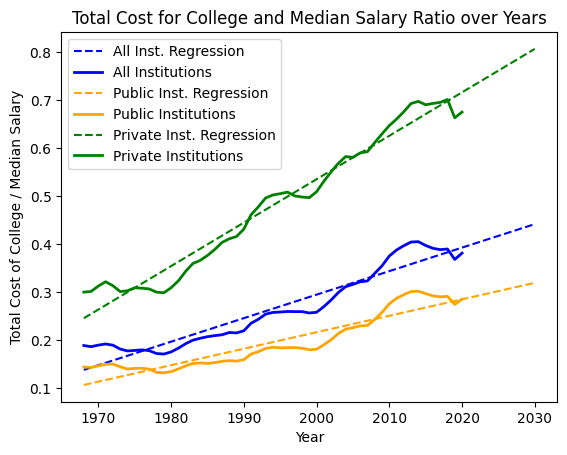

In [21]:
# Creating color labels for each plot
colors = ['blue', 'orange', 'green']

# Creating list for each linear regression formula
models = [model_all_institutions.params, model_public_institutions.params, model_private_institutions.params]

# Plotting data for each institution type
for idx, df in enumerate(df_college_cost):

    # Plotting linear regression model
    plt.plot(
        pd.Series([year for year in range(1968, 2031)]),
        models[idx][1] * pd.Series([year for year in range(1968, 2031)]) + models[idx][0],
        linestyle='--',
        color=colors[idx]
    )

    # PLotting total cost to median ratio
    plt.plot(
        df['Year'],
        df['Total'] / df['Estimate'],
        linewidth=2,
        color=colors[idx]
    )

# Labeling plot
plt.xlabel('Year')
plt.ylabel('Total Cost of College / Median Salary')
plt.title('Total Cost for College and Median Salary Ratio over Years')
plt.legend(['All Inst. Regression', 'All Institutions',
            'Public Inst. Regression', 'Public Institutions',
            'Private Inst. Regression', 'Private Institutions'])

# Displaying plot 
plt.show()

According to our linear regression model, by 2030 the Total Cost for all colleges will consume about 40% of the estimated Median Salary. For only public colleges it will cost about 30% of the Median Salary on average, and for private colleges it will represent about 80% of the yearly salary.

It's important to remind ourselves that models aren't absolute and that, even with the same data, they can vary drastically. To demonstrate this lets create a new regression model for the 'All Institutions' dataframe but instead of using all of the data well only use data from 2000 and onward.

In [22]:
# Modeling linear regression for only years after 1999
model = smf.ols(formula='Ratio ~ Year', data=df_college_cost_all[32:]).fit()

# Displaying results
print(model_private_institutions.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ratio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1444.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.39e-39
Time:                        18:41:11   Log-Likelihood:                 118.16
No. Observations:                  53   AIC:                            -232.3
Df Residuals:                      51   BIC:                            -228.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5775      0.475    -36.988      0.0

Here we have a P-value of 0.000 meaning we have a confidence level of 99%, just as when we included all data, but our 'coef' column is now different. Let's plot this out and compare with the previous regression line.

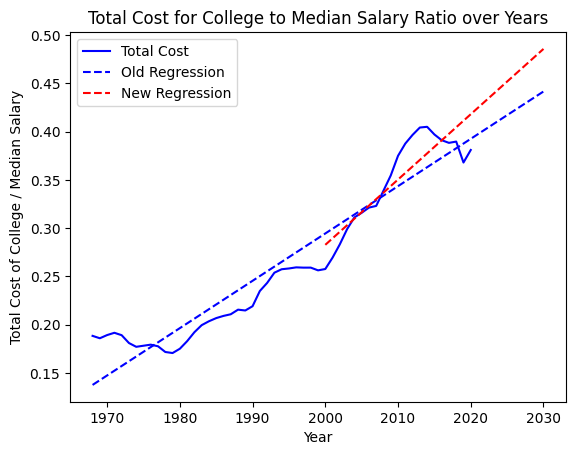

2030 Regression Delta: 0.044


In [23]:
# PLotting total cost of 'all institutions' to median salary ratio
plt.plot(
    df_college_cost_all['Year'],
    df_college_cost_all['Total'] / df_college_cost_all['Estimate'],
    c='b'
)

# Plotting linear regression model using data from all years
plt.plot(
    pd.Series([year for year in range(1968, 2031)]),
    models[0][1] * pd.Series([year for year in range(1968, 2031)]) + models[0][0],
    linestyle='--',
    color='b'
)

# Plotting linear regression model using data from years 2000+
plt.plot(
    pd.Series([year for year in range(2000, 2031)]),
    model.params[1] * pd.Series([year for year in range(2000, 2031)]) + model.params[0],
    color='r',
    linestyle='--'
)


# Labeling Plot
plt.xlabel('Year')
plt.ylabel('Total Cost of College / Median Salary')
plt.title('Total Cost for College to Median Salary Ratio over Years')
plt.legend(['Total Cost', 'Old Regression', 'New Regression'])

# Displaying Plot
plt.show()

# Calculating change in regression ratios (New - Old)
change = round((model.params[1] * 2030 + model.params[0]) - (models[0][1] * 2030 + models[0][0]), 3)

# Displaying Change
print(f'2030 Regression Delta: {change}')

As you can see, even when using the same data and only changing the start year, we can get predictions that are very different from each other. This is why it's best practice not to try to predict values too far into the future as the farther you go, the less accurate your regression model is likely to be.

## 6. Communication of Insights Attained

From this tutorial we were able to gain many new insights on the cost of college and median salaries:
1. The Median Salary is increasing.
2. The Total Cost of college is increasing.
3. The cost of private institutions is the highest and is increasing fastest.
4. The Total Costs of all college types is taking up more of the Median Salary than previous years.
5. All types of cost (Tuition and Fees, Dormitory, Board) in colleges are increasing.
6. Tuitions and Fees make up the bulk of Total Cost.
7. Tuitions and Fees cost is increasing the fastest of the types of cost.
8. The Total Cost of college to Median Salary ratio is likely to continue to grow

This list is non-exhaustive. There were more insights that were had, and more insights that could be made with both the data we did use and the data that we did not use, but I'd also like to highlight the insights that we didn't make.

In this example we showed that the total cost of college is taking up more and more of the median salary as years go by. We ***did not*** show that this is because colleges are charging more than they should for the times. Another explanation could be that colleges aren't charging too much, but instead people are getting paid too little. It could be both of these reasons, and it could even be neither (although that feels unlikely). Data science is a very useful tool for figuring out what is happening in the world and by how much, but don't confuse it as an answer to 'why?'

Nevertheless, from this tutorial we were able to go over the entirety of the 'Data Science Pipeline.' Data science is one of the most useful sciences to know and, when you apply it to things you care about, can even be really fun. That said, you are now prepared to move on to step 7:

## 7. Do it Yourself

Free resources for finding Datasets:
- [kaggle.com](https://www.kaggle.com/)
- [datasetsearch.research.google.com](https://datasetsearch.research.google.com/)
- [wikipedia.org/wiki/List_of_open_government_data_sites](https://en.wikipedia.org/wiki/List_of_open_government_data_sites)


Documentation:
- [Pandas Documentation](https://pandas.pydata.org/docs/reference/index.html#api)
- [matplotlib Documentation](https://matplotlib.org/stable/api/index.html)
- [matplotlib Plot Examples](https://matplotlib.org/stable/gallery/index.html)
- [statsmodels Documentation](https://www.statsmodels.org/dev/api.html)

[meme](https://humornama.com/wp-content/uploads/2021/01/Data-Scientist-vs-Statistician-meme-on-tuxedo-winnie-the-pooh.jpg)